# Ejercicio 7

In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook: # maquina virtual colab
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR  = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR    = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '/content/drive/MyDrive/Colab Notebooks/MODELOS/'    # carpeta donde se encuentran los modelos
    ARCHIVOS_DIR = '/content/drive/MyDrive/Colab Notebooks/ARCHIVOS/'   # carpeta recuperar o copiar archivos
else: # maquina local ipython
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR  = '../Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
    ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

El archivo automobile-simple.csv contiene 11 atributos de automóviles de un total de 205 registros. Es una 
versión modificada y simplificada del dataset disponible en el repositorio UCI 
https://archive.ics.uci.edu/ml/datasets/Automobile. La siguiente tabla contiene una breve descripción de los 
atributos que contiene el archivo y caracterizan a cada vehículo

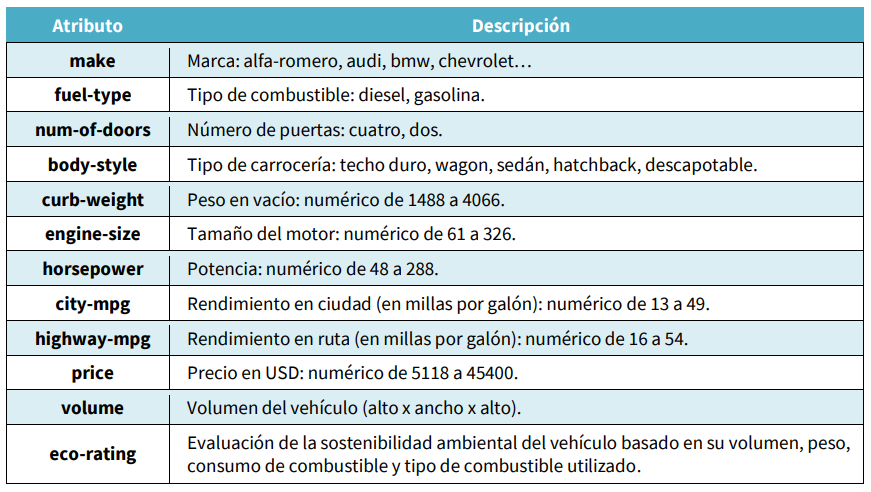

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection,preprocessing
from ClassPerceptron import Perceptron
from matplotlib import pylab as plt


- a) Para cada atributo indique si es Discreto, Continuo, Nominal u Ordinal.
- b) Elimine los registros que presenten valores faltantes.
- c) Calcule la matriz de correlación usando los atributos numéricos.
- d) Realice el entrenamiento de un perceptrón para que aprenda a clasificar si un auto es ecológico. 
Tenga en cuenta los siguientes pasos:
1.  Utilice el atributo eco-rating para generar un nuevo atributo binario que determine si un auto es 
ecológico o no. Un auto es considerado ecológico si el valor de eco-rating supera la media de 
dicho atributo.
2.  Genere y compare 3 modelos utilizando diferentes normalizaciones (Sin normalizar, 
normalización lineal, normalización estándar.
3.  Teniendo en cuenta la matriz de correlación del punto c) repita el punto II) eliminando dos 
atributos fuertemente correlacionados (uno negativo y otro positivo). Compare y reflexione 
sobre los resultados obtenidos.

In [4]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos


nombre_archivo = DATOS_DIR + 'automobile-simple.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe

display(df)

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,four,sedan,2952,141,114.0,23,28,16845.0,721961.760,38.354298
201,volvo,gas,four,sedan,3049,141,160.0,19,25,19045.0,720913.920,32.043335
202,volvo,gas,four,sedan,3012,173,134.0,18,23,21485.0,721961.760,29.806494
203,volvo,diesel,four,sedan,3217,145,106.0,26,27,22470.0,721961.760,35.073342


### Inciso a

Para cada atributo indique si es Discreto, Continuo, Nominal u Ordinal.

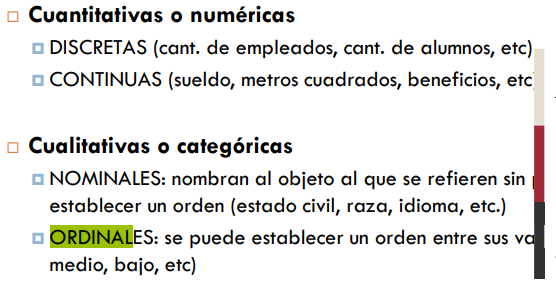

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          205 non-null    object 
 1   fuel-type     205 non-null    object 
 2   num-of-doors  203 non-null    object 
 3   body-style    205 non-null    object 
 4   curb-weight   205 non-null    int64  
 5   engine-size   205 non-null    int64  
 6   horsepower    203 non-null    float64
 7   city-mpg      205 non-null    int64  
 8   highway-mpg   205 non-null    int64  
 9   price         201 non-null    float64
 10  volume        205 non-null    float64
 11  eco-rating    205 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 19.3+ KB


In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_categorical = df[categorical_columns]


numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_columns]

VARIABLES CATEGORICAS O CUALITATIVAS: nominales u ordinales

In [16]:
df_categorical.head()

,make,fuel-type,num-of-doors,body-style
0,alfa-romero,gas,two,convertible
1,alfa-romero,gas,two,convertible
2,alfa-romero,gas,two,hatchback
3,audi,gas,four,sedan
4,audi,gas,four,sedan


- make : nominal
- fuel-type : nominal
- num-of-doors : ordinal
- body-style : nominal

VARIABLES NUMERICAS O CUANTITATIVAS: discretas o continuas

In [15]:
df_numeric.head()

,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,2824,136,115.0,18,22,17450.0,636734.832,27.997459


In [10]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   curb-weight  205 non-null    int64  
 1   engine-size  205 non-null    int64  
 2   horsepower   203 non-null    float64
 3   city-mpg     205 non-null    int64  
 4   highway-mpg  205 non-null    int64  
 5   price        201 non-null    float64
 6   volume       205 non-null    float64
 7   eco-rating   205 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 12.9 KB


In [11]:
discretas_columns = df.select_dtypes(include=['int64']).columns
df_discretas = df[discretas_columns]


continuas_columns = df.select_dtypes(include=['float64']).columns
df_continuas = df[continuas_columns]

In [13]:
df_discretas.head()

,curb-weight,engine-size,city-mpg,highway-mpg
0,2548,130,21,27
1,2548,130,21,27
2,2823,152,19,26
3,2337,109,24,30
4,2824,136,18,22


In [14]:
df_continuas.head()

,horsepower,price,volume,eco-rating
0,111.0,13495.0,528019.904,33.297462
1,111.0,16500.0,528019.904,33.297462
2,154.0,16500.0,587592.640,30.898272
3,102.0,13950.0,634816.956,42.697819
4,115.0,17450.0,636734.832,27.997459


DICRETAS
- curb-weight
- engine-size
- city-mpg
- highway-mpg

CONTINUAS
- horsepower
- price
- volume
- eco-rating

### Inciso b

 b) Elimine los registros que presenten valores faltantes.

In [17]:
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    2
body-style      0
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
volume          0
eco-rating      0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    0
body-style      0
curb-weight     0
engine-size     0
horsepower      0
city-mpg        0
highway-mpg     0
price           0
volume          0
eco-rating      0
dtype: int64

### Inciso c

- c) Calcule la matriz de correlación usando los atributos numéricos.

In [20]:
df_numeric.corr()

,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
curb-weight,1.000000,0.850594,0.751034,-0.757414,-0.797465,0.834415,0.819806,-0.842111
engine-size,0.850594,1.000000,0.810773,-0.653658,-0.677470,0.872335,0.594351,-0.719602
horsepower,0.751034,0.810773,1.000000,-0.803620,-0.770908,0.810533,0.429840,-0.816182
city-mpg,-0.757414,-0.653658,-0.803620,1.000000,0.971337,-0.686571,-0.550292,0.977349
highway-mpg,-0.797465,-0.677470,-0.770908,0.971337,1.000000,-0.704692,-0.602410,0.983781
price,0.834415,0.872335,0.810533,-0.686571,-0.704692,1.000000,0.628701,-0.744017
volume,0.819806,0.594351,0.429840,-0.550292,-0.602410,0.628701,1.000000,-0.593856
eco-rating,-0.842111,-0.719602,-0.816182,0.977349,0.983781,-0.744017,-0.593856,1.000000


### Inciso c

- d) Realice el entrenamiento de un perceptrón para que aprenda a clasificar si un auto es ecológico. 
Tenga en cuenta los siguientes pasos:
1.  Utilice el atributo eco-rating para generar un nuevo atributo binario que determine si un auto es 
ecológico o no. Un auto es considerado ecológico si el valor de eco-rating supera la media de 
dicho atributo.
2.  Genere y compare 3 modelos utilizando diferentes normalizaciones (Sin normalizar, 
normalización lineal, normalización estándar.
3.  Teniendo en cuenta la matriz de correlación del punto c) repita el punto II) eliminando dos 
atributos fuertemente correlacionados (uno negativo y otro positivo). Compare y reflexione 
sobre los resultados obtenidos.

In [22]:
df_categorical.head()

,make,fuel-type,num-of-doors,body-style
0,alfa-romero,gas,two,convertible
1,alfa-romero,gas,two,convertible
2,alfa-romero,gas,two,hatchback
3,audi,gas,four,sedan
4,audi,gas,four,sedan


In [25]:
df['num-of-doors'].value_counts()

four    112
two      85
Name: num-of-doors, dtype: int64

In [26]:
#-- ordinales a numericos ---
mapeo = {'num-of-doors': {'two':0, 'four':1}}

df.replace(mapeo, inplace=True)
df

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,0,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,0,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,0,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,1,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,1,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,1,sedan,2952,141,114.0,23,28,16845.0,721961.760,38.354298
201,volvo,gas,1,sedan,3049,141,160.0,19,25,19045.0,720913.920,32.043335
202,volvo,gas,1,sedan,3012,173,134.0,18,23,21485.0,721961.760,29.806494
203,volvo,diesel,1,sedan,3217,145,106.0,26,27,22470.0,721961.760,35.073342


In [30]:
#-- cualitativos a numericos --
df2 = pd.get_dummies(df.iloc[:])
df2.head()

,num-of-doors,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating,make_alfa-romero,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,0,2548,130,111.0,21,27,13495.0,528019.904,33.297462,1,...,0,0,0,0,1,1,0,0,0,0
1,0,2548,130,111.0,21,27,16500.0,528019.904,33.297462,1,...,0,0,0,0,1,1,0,0,0,0
2,0,2823,152,154.0,19,26,16500.0,587592.640,30.898272,1,...,0,0,0,0,1,0,0,1,0,0
3,1,2337,109,102.0,24,30,13950.0,634816.956,42.697819,0,...,0,0,0,0,1,0,0,0,1,0
4,1,2824,136,115.0,18,22,17450.0,636734.832,27.997459,0,...,0,0,0,0,1,0,0,0,1,0


In [32]:
df2['eco-rating']

0      33.297462
1      33.297462
2      30.898272
3      42.697819
4      27.997459
         ...    
200    38.354298
201    32.043335
202    29.806494
203    35.073342
204    31.997368
Name: eco-rating, Length: 197, dtype: float64

In [35]:
media = df2['eco-rating'].mean()
media

42.09494272062433

In [40]:
X = np.array(df2.iloc[:,:-1])
Y = np.array((df2['eco-rating'] >=  media) * 1) #el valor de ecorasting supera la media va 1

In [41]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y, test_size=0.30, random_state=42)

In [42]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    #--- Normalización lineal entre 0 y 1 ---
    normalizador1 = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    normalizador2= preprocessing.StandardScaler()
    
    #transformacion de variables con NORMALIZACION LINEAL
    X_train_lineal = normalizador1.fit_transform(X_train)
    X_test_lineal  = normalizador1.transform(X_test)

    #transformacion de variables con NORMALIZACION ESTANDAR
    X_train_estandar = normalizador2.fit_transform(X_train)
    X_test_estandar  = normalizador2.transform(X_test)

ENTRENAMIENTO DEL PERCEPTRON

con lineal:

In [43]:
ppn1 = Perceptron(alpha=0.01, n_iter=650, random_state=None)
ppn1.fit(X_train_lineal, y_train)

con estandar

In [44]:
ppn2 = Perceptron(alpha=0.01, n_iter=650, random_state=None)
ppn2.fit(X_test_estandar, y_train)

CALIDAD DEL MODELO

lineal

In [45]:
Y_pred = ppn1.predict(X_test_lineal)

aciertos = sum(Y_pred == y_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_pred == y_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))

aciertos =  54
% de aciertos = 90.00 %


estandar

In [46]:
Y_pred = ppn2.predict(X_test_estandar)

aciertos = sum(Y_pred == y_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_pred == y_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))

aciertos =  18
% de aciertos = 30.00 %


Podemos ver que con una normalizacion lineal, la calidad del modelo es mucho mejor que usando una normalizacion estandar

### VARIANTE inciso d

Teniendo en cuenta la matriz de correlación del punto c) repita el punto II) eliminando dos 
atributos fuertemente correlacionados (uno negativo y otro positivo). Compare y reflexione 
sobre los resultados obtenidos.

In [47]:
df2.corr()

,num-of-doors,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating,make_alfa-romero,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
num-of-doors,1.000000,0.213501,0.028087,-0.099274,-0.035202,-0.053354,0.046571,0.477374,-0.034539,-0.142744,...,-0.005360,0.050465,0.211856,0.180466,-0.180466,-0.203450,-0.236164,-0.607731,0.527856,0.324476
curb-weight,0.213501,1.000000,0.848932,0.759925,-0.755559,-0.800113,0.834732,0.822823,-0.842957,0.019404,...,-0.099307,-0.105353,0.224027,0.228708,-0.228708,0.082824,0.099683,-0.327809,0.133364,0.167701
engine-size,0.028087,0.848932,1.000000,0.825286,-0.655737,-0.684662,0.873708,0.592571,-0.723965,0.030752,...,-0.086193,-0.120286,0.088870,0.073664,-0.073664,0.127913,0.242393,-0.247753,0.115714,-0.031137
horsepower,-0.099274,0.759925,0.825286,1.000000,-0.821960,-0.803658,0.811953,0.449278,-0.839619,0.071973,...,-0.126951,-0.152775,0.158024,-0.157317,0.157317,0.132480,0.211779,-0.113439,0.016376,-0.058077
city-mpg,-0.035202,-0.755559,-0.655737,-0.821960,1.000000,0.972407,-0.692948,-0.554978,0.976650,-0.093320,...,0.161006,0.136080,-0.150364,0.246642,-0.246642,-0.128407,-0.113010,0.168191,-0.030120,-0.062002
highway-mpg,-0.053354,-0.800113,-0.684662,-0.803658,0.972407,1.000000,-0.708659,-0.608072,0.984258,-0.072268,...,0.147044,0.160128,-0.171587,0.179146,-0.179146,-0.120330,-0.101964,0.186721,-0.023737,-0.109487
price,0.046571,0.834732,0.873708,0.811953,-0.692948,-0.708659,1.000000,0.631578,-0.747982,0.034531,...,-0.187059,-0.102070,0.145594,0.115472,-0.115472,0.191012,0.229913,-0.298418,0.150436,-0.036336
volume,0.477374,0.822823,0.592571,0.449278,-0.554978,-0.608072,0.631578,1.000000,-0.598520,-0.112385,...,-0.102262,0.017028,0.310375,0.285756,-0.285756,-0.100006,0.015436,-0.496664,0.304247,0.298507
eco-rating,-0.034539,-0.842957,-0.723965,-0.839619,0.976650,0.984258,-0.747982,-0.598520,1.000000,-0.098204,...,0.144409,0.145024,-0.156581,0.091623,-0.091623,-0.145111,-0.122586,0.178559,-0.021016,-0.076352
make_alfa-romero,-0.142744,0.019404,0.030752,0.071973,-0.093320,-0.072268,0.034531,-0.112385,-0.098204,1.000000,...,-0.054764,-0.031671,-0.030241,-0.040628,0.040628,0.460399,-0.025584,-0.001777,-0.116402,-0.046317


In [52]:
correlation_matrix = df2.corr()
high_corr = correlation_matrix[(correlation_matrix >= 0.8) | (correlation_matrix <= -0.8) & (correlation_matrix != 1)]
#le puse un umbral para que me muestre las columnas que tienen una correlacion mayor a 0.8 o a -0.8
high_corr

,num-of-doors,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating,make_alfa-romero,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
num-of-doors,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curb-weight,NaN,1.000000,0.848932,NaN,NaN,-0.800113,0.834732,0.822823,-0.842957,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine-size,NaN,0.848932,1.000000,0.825286,NaN,NaN,0.873708,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
horsepower,NaN,NaN,0.825286,1.000000,-0.821960,-0.803658,0.811953,NaN,-0.839619,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city-mpg,NaN,NaN,NaN,-0.821960,1.000000,0.972407,NaN,NaN,0.976650,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
highway-mpg,NaN,-0.800113,NaN,-0.803658,0.972407,1.000000,NaN,NaN,0.984258,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,0.834732,0.873708,0.811953,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volume,NaN,0.822823,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eco-rating,NaN,-0.842957,NaN,-0.839619,0.976650,0.984258,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
make_alfa-romero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CORRELACIONES
-  + : curb-weight con engine-size (correlacion de 0.8)
-  - : horsepower con highway-mpg (correlacion de -0.8) 

Solo tengo que eliminar dos atributos, por lo que voy a eliminar
1. engine-size
2. horsepower

In [53]:
df_limpio = df2.drop(['engine-size', 'horsepower'], axis=1)
df_limpio.head()


,num-of-doors,curb-weight,city-mpg,highway-mpg,price,volume,eco-rating,make_alfa-romero,make_audi,make_bmw,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,0,2548,21,27,13495.0,528019.904,33.297462,1,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,2548,21,27,16500.0,528019.904,33.297462,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,2823,19,26,16500.0,587592.640,30.898272,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1,2337,24,30,13950.0,634816.956,42.697819,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,1,2824,18,22,17450.0,636734.832,27.997459,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [54]:
X = np.array(df_limpio.iloc[:,:-1])
Y = np.array((df_limpio['eco-rating'] >=  media) * 1) #el valor de ecorasting supera la media va 1

In [55]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y, test_size=0.30, random_state=42)

In [56]:
#normalizacion lineal ya que se demostro que tenia mejores metricas 

normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    #--- Normalización lineal entre 0 y 1 ---
    normalizador1 = preprocessing.MinMaxScaler()
    
    #transformacion de variables con NORMALIZACION LINEAL
    X_train_lineal = normalizador1.fit_transform(X_train)
    X_test_lineal  = normalizador1.transform(X_test)


In [57]:
ppn1 = Perceptron(alpha=0.01, n_iter=650, random_state=None)
ppn1.fit(X_train_lineal, y_train)

In [58]:
Y_pred = ppn1.predict(X_test_lineal)

aciertos = sum(Y_pred == y_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_pred == y_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))

aciertos =  55
% de aciertos = 91.67 %


Podemos ver que al eliminar columnas que estaban linealmente correlacionadas, la calidad del modelo subio